In [21]:
import pandas as pd
import numpy as np

## Example 1:
We have a dataset that has about 30 features, we will want to reduce the number of features being used, so that we can train the dataset with lesser complexity

In [22]:
raw_data = pd.read_csv("../data/lesson7/features.csv")

In [23]:
print("number of features in table: " + str(len(raw_data.dtypes)-2))
raw_data.head().transpose()

number of features in table: 32


,0,1,2,3,4
total_score,0.016179,0.060323,0.109066,0.152926,0.023338
total_opponent_score,0.022804,0.082161,0.142904,0.196478,0.021182
total_rebounds,0.014417,0.054206,0.096439,0.135208,0.014061
total_off_rebounds,0.010464,0.044034,0.076152,0.103619,0.003052
total_def_rebounds,0.016552,0.059696,0.107389,0.152259,0.020003
total_blocks,0.003550,0.013314,0.032840,0.053254,0.009172
total_assists,0.011125,0.051270,0.093349,0.134462,0.029746
total_steals,0.014599,0.054988,0.099270,0.141849,0.025791
total_turnover,0.020070,0.070105,0.120557,0.171010,0.020767
total_personalfoul,0.027708,0.088496,0.152128,0.210493,0.035293


#### Remove away columns that are not required in training of model

In [24]:
rawdata = (
    raw_data
    .drop(['Season','TeamID'],1)
)

### Before applying PCA to the dataset, we will have to remove correlated features
- why?
    - In presence of correlated variables, the variance explained by a particular component gets inflated.
    - We have more unnecessary eigen values, which increases the variance incorrectly

In [25]:
corr = rawdata.corr()

### Remove features that have correlation than 0.7

In [26]:
features_table = (
    rawdata
    .drop(['total_score','total_opponent_score','total_rebounds','total_blocks','total_assist_turnover_ratio','expectation_per_game',
           'win_rate','fg3p','win_rate_overall','total_off_rebounds_percent','total_def_rebounds_percent','total_rebound_possession_percent','total_rebound_possessiongain_percent'
          ],1)
    .fillna(0)
)

In [9]:
print("Number of features left: " + str(len(features_table.dtypes)))

Number of features left: 19


### Apply PCA to `features_table`

In [10]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

from sklearn.decomposition import PCA

In [11]:
pca = PCA()#PCA(n_components = 19) # number of features
pca.fit(features_table) # fit the features table into PCA

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

Text(0,0.5,'cumulative explained variance')

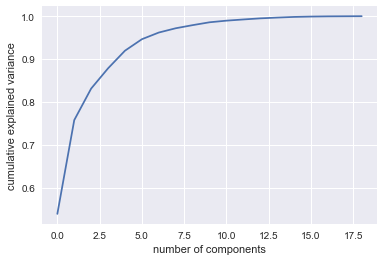

In [12]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [13]:
np.cumsum(np.round(pca.explained_variance_ratio_, decimals=5)*100)

array([ 53.87 ,  75.75 ,  83.114,  87.838,  91.951,  94.629,  96.187,
        97.186,  97.912,  98.579,  98.959,  99.237,  99.497,  99.675,
        99.829,  99.913,  99.963,  99.984, 100.   ])

### Assuming we would like to cut off at 95% variance
- 7 variables retained

In [14]:
pca = PCA(n_components=7)
pca.fit(features_table)

PCA(copy=True, iterated_power='auto', n_components=7, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

### Get back original data from the 7 features selected

In [19]:
post_pca_array = pca.fit_transform(features_table)
X_new = pca.inverse_transform(post_pca_array)

In [20]:
X_new.shape

(5172, 19)

#### `post_pca_array` will be the dimension reduction matrix that will be used in classification or regression moving forward
- notice how PCA doesnt drop any of the columns but instead of 19 columns its being compressed to 7 column (or components)